## Implementación de Modelos Predictivos


Elecciones

En nuestro caso hemos decido implementar los modelos Grandient Boosting y Random Forest ya que para este caso son los más idoneos.

Aun así, como ejercicio comparativo, vamos a implementar todos los modelos de regresión que hemos visto a lo largo de las clases, ver sus ventajas, desventajas y resultados.


In [1]:
## Importacion
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import (mean_squared_error, r2_score)


In [6]:
# importo el dataset transformado
df = pd.read_csv('trasnformado.csv')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15952 entries, 0 to 15951
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15952 non-null  object 
 1   AveragePrice  15952 non-null  float64
 2   Total Volume  15952 non-null  float64
 3   4046          15952 non-null  float64
 4   4225          15952 non-null  float64
 5   4770          15952 non-null  float64
 6   Total Bags    15952 non-null  float64
 7   Small Bags    15952 non-null  float64
 8   Large Bags    15952 non-null  float64
 9   XLarge Bags   15952 non-null  float64
 10  type          15952 non-null  object 
 11  year          15952 non-null  int64  
 12  region        15952 non-null  object 
 13  month         15952 non-null  int64  
 14  day           15952 non-null  int64  
dtypes: float64(9), int64(3), object(3)
memory usage: 1.8+ MB


In [18]:
min_price = df["AveragePrice"].min()
max_price = df["AveragePrice"].max()
print(f"Rango de AveragePrice: {min_price} a {max_price}")

Rango de AveragePrice: 0.44 a 3.25


In [7]:
# Lista de columnas a eliminar
columnas_a_eliminar = ["Date", "year", "type", "month", "day"]

# Eliminar las columnas (axis=1 indica que son columnas, inplace=True modifica el df original)
df.drop(columns=columnas_a_eliminar, inplace=True)

In [8]:
# transformamos la columna de region a dummie
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df

# Dividir en x e y
y = df['AveragePrice']
x = df.drop(columns=['AveragePrice'])
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region_Atlanta,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,False,...,False,False,False,False,False,False,False,False,False,False
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,False,...,False,False,False,False,False,False,False,False,False,False
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,False,...,False,False,False,False,False,False,False,False,False,False
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,False,...,False,False,False,False,False,False,False,False,False,False
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15947,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,False,...,False,False,False,False,False,False,False,False,False,True
15948,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,False,...,False,False,False,False,False,False,False,False,False,True
15949,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,False,...,False,False,False,False,False,False,False,False,False,True
15950,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,False,...,False,False,False,False,False,False,False,False,False,True


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15952 entries, 0 to 15951
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AveragePrice                15952 non-null  float64
 1   Total Volume                15952 non-null  float64
 2   4046                        15952 non-null  float64
 3   4225                        15952 non-null  float64
 4   4770                        15952 non-null  float64
 5   Total Bags                  15952 non-null  float64
 6   Small Bags                  15952 non-null  float64
 7   Large Bags                  15952 non-null  float64
 8   XLarge Bags                 15952 non-null  float64
 9   region_Atlanta              15952 non-null  bool   
 10  region_BaltimoreWashington  15952 non-null  bool   
 11  region_Boise                15952 non-null  bool   
 12  region_Boston               15952 non-null  bool   
 13  region_BuffaloRochester     159

In [10]:
# Dividir en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Mostrar las formas de los conjuntos resultantes
print(f"Datos de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Datos de prueba: {X_test.shape}, {y_test.shape}")

Datos de entrenamiento: (12761, 61), (12761,)
Datos de prueba: (3191, 61), (3191,)



## Random Forest Regressor
# Que hace?

    Crear muchos árboles de decisión.

    Cada árbol se entrena con una muestra aleatoria del dataset (con reemplazo, esto se llama bootstrap sampling).

    Cada vez que el árbol toma una decisión sobre qué variable usar para dividir, elige aleatoriamente entre un subconjunto de las variables disponibles (feature bagging).

    La predicción final es el promedio de todas las predicciones de los árboles individuales (en regresión).

# Por que es bueno en este caso?

En general es bueno debido a que este dataset tiene complejidad (diferentes regiones, fechas, tipos), y Random Forest captura esa complejidad sin sobreajustar. Especificamente lo que hace este modelo de predicción bueno en este caso es que

    reduce overfitting: datos como precio fluctuan mucho, este modelo captura tendencias sin memorizar ruidos
    Maneja relaciones no lineales: No asume relaciones lineales entre variables, el precio puede depender de combinaciones complemas de volumen, región y tipo.
    Mejo de alta dimensionalidad: puede trabajar bien bajo muchas variables. En este caso las fechas las tenemos codifcadas, los tipos, y las regiones, generando muchas columnas dummies.
    Robustez ante valores atípicos: los arboles son relativamente robustos a outliers, por tanto si hay precios extraños o volumenes anomalos, no afectan mucho al modelo.



In [11]:
# Entrenar el modelo
rf_reg = RandomForestRegressor(n_estimators=300, max_depth=9,)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, n_estimators=300)

In [12]:
# calculo de R2 y MSE
y_pred_rf = rf_reg.predict(X_test)
MSE_RF = mean_squared_error(y_test, y_pred_rf)
R2_RF = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf):.3f}")
print(f"Random Forest R2: {r2_score(y_test, y_pred_rf):.3f}")

# Para Random Forest
importances_rf = rf_reg.feature_importances_


Random Forest MSE: 0.055
Random Forest R2: 0.653


# Interpretación de las graficas a continuación para la precisión de los modelos

Hemos decidido incluir estas graficas para acompañar visualmente las predicciones de los modelos, esta interpretación en general es la misma para las graficas del mismo tipo en los modelos que hemos implementado.

    Cada punto azul es una predicción hecha por el modelo para un dato de prueba.
    Si un punto está sobre la línea roja, significa que la predicción fue perfecta.
    Si un punto está por arriba de la línea roja, significa que el modelo sobreestimó el precio (predijo un valor mayor que el real).
    Si un punto está por debajo de la línea roja, significa que el modelo subestimó el precio (predijo un valor menor que el real).

Observación 	Significado
Puntos muy cerca de la línea roja 	El modelo predice muy bien.
Puntos muy dispersos respecto a la línea roja 	El modelo comete errores grandes.
Patrón de dispersión (curvaturas, formas raras) 	El modelo no capta bien alguna relación entre las variables.

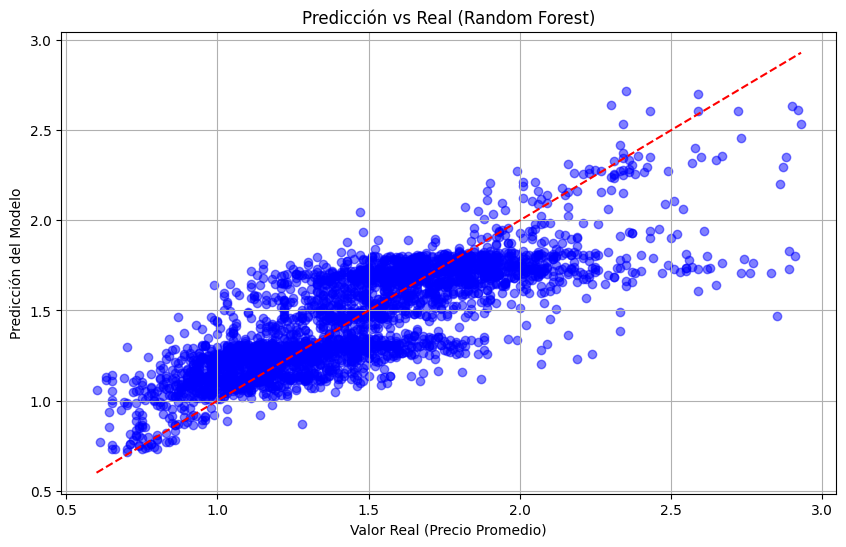

In [13]:
# grafico
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicción vs Real (Random Forest)')
plt.xlabel('Valor Real (Precio Promedio)')
plt.ylabel('Predicción del Modelo')
plt.grid(True)
plt.show()


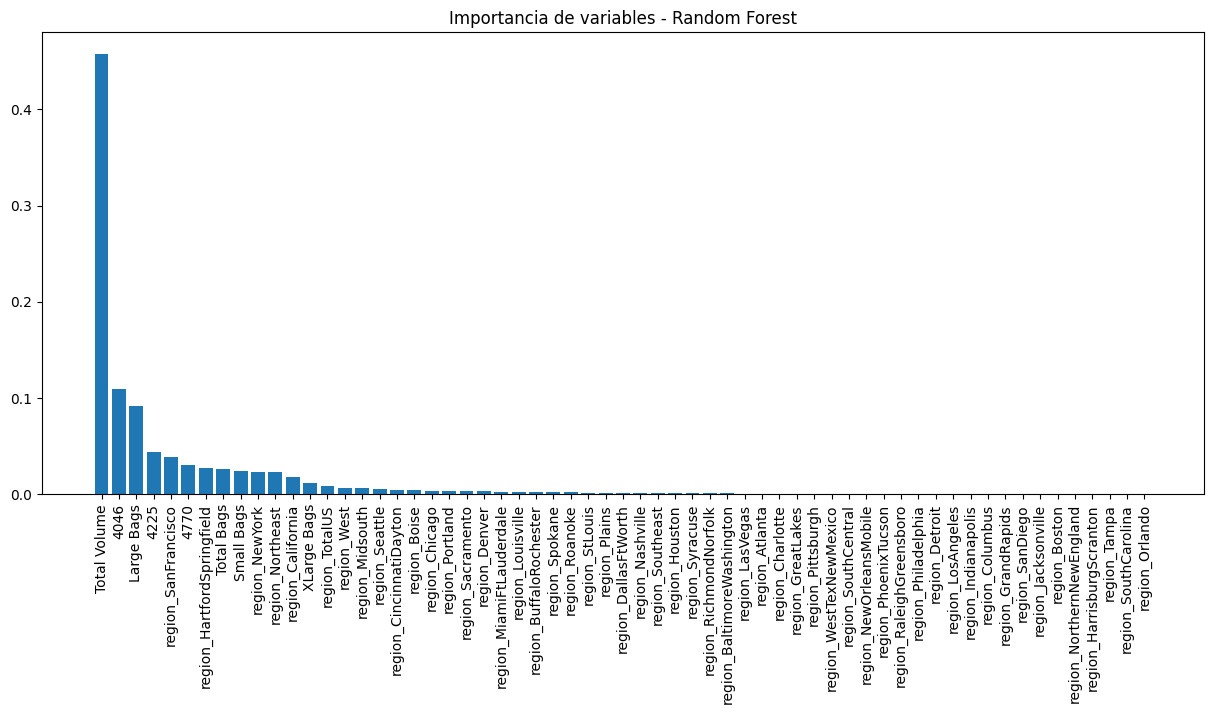

In [14]:
# Suponiendo que tienes los nombres de las columnas
feature_names = X_train.columns

# Para Random Forest
indices_rf = np.argsort(importances_rf)[::-1]  # Orden descendente
plt.figure(figsize=(15, 6))
plt.title("Importancia de variables - Random Forest")
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices_rf], rotation=90)
plt.show()


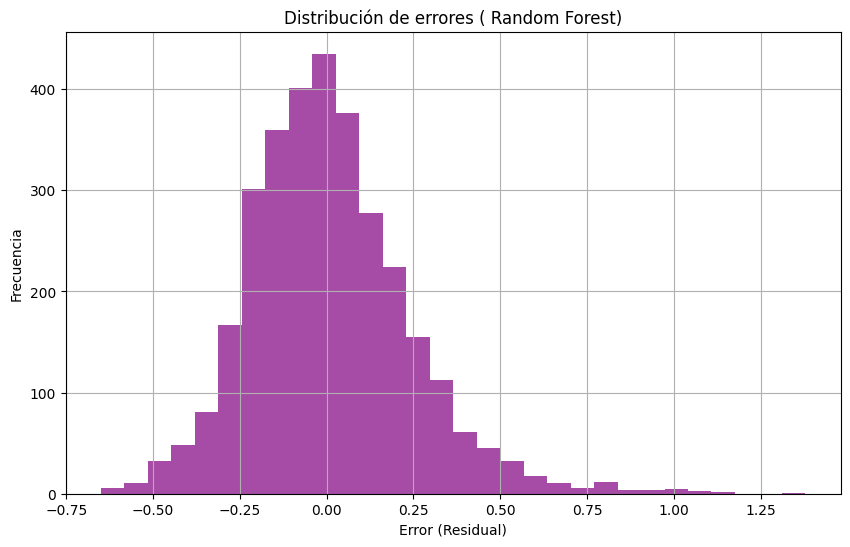

In [15]:
errors_rf = y_test - y_pred_rf

# Crear figura y eje
fig_rf, ax_rf = plt.subplots(figsize=(10, 6))

# Hacer la gráfica
ax_rf.hist(errors_rf, bins=30, color='purple',  alpha=0.7)
ax_rf.set_title('Distribución de errores ( Random Forest)')
ax_rf.set_xlabel('Error (Residual)')
ax_rf.set_ylabel('Frecuencia')
ax_rf.grid(True)



## Gradient Boosting Regressor
# Que hace?

Este es un modelo de ensamble de árboles de decisión, pero funciona diferente que Random Forest:

    Los árboles se construyen secuencialmente: Cada nuevo árbol intenta corregir los errores que cometieron los árboles anteriores.

    Funciona como una optimización: A cada paso, el modelo intenta minimizar una función de pérdida (por ejemplo, el error cuadrático) usando un método similar al gradiente descendente.

    Predicción final: Se suman las predicciones de todos los árboles, pero cada uno contribuye con un pequeño peso.

# Como funciona?

Primero, crea un árbol pequeño (normalmente poco profundo, tipo "weak learner") que intenta predecir el precio.

Luego, calcula el error (residuales) de ese primer árbol.

Después, crea un segundo árbol que intenta predecir ese error.

Y así sucesivamente, cada nuevo árbol corrige los errores de la suma de todos los árboles anteriores.

Finalmente, la predicción es la suma de todas las correcciones.
Por que es bueno en este caso?

    Muy alta precision: ya que corrige iterativamente los errores, el precio del agucata puede depender de varias combinaciones sutiles de variables
    Manejo fino de errores: Se enfoca en corregir los errores más dificiles, en caso de que existan variaciones locales en precios segun región/fecha, este modelo las capta de forma adecuada
    Modela relaciones complejas: Muy bueno para relaciones nolineales y efectos de interacción entre variables, ya que variables como tipo, volumen, región interactuan de forma compleja.



In [16]:
gb_reg = GradientBoostingRegressor(n_estimators=10000, 
                                   learning_rate=0.05,
                                   max_depth=9,
                                   min_samples_split=10,
                                   min_samples_leaf=50,
                                   subsample=0.8,
                                   max_features='sqrt',
                                   )
gb_reg.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.05, max_depth=9, max_features='sqrt',
                          min_samples_leaf=50, min_samples_split=10,
                          n_estimators=10000, subsample=0.8)


# Explicación de hiperparametros

Debido a que este fue el modelo el cual desde un inicio presento las mejores estadisticas sin tanto rodeo en los hiperparametros (un MSE bajo y un R2 alto) lo vimos como el modelo predilecto a ser el mejor para este caso, debido a ellos comenzamos a jugar con los hiperparametros para conseguir la mejor configuración, y con ello llegamos a los hiperparametros vistos anteriormente.

El tiempo de entrenamiento toma alrededor de 2 minutos.

    n_estimators: Número total de árboles que voy a entrenar. Cada árbol corrige los errores del árbol anterior. Más árboles pueden significar mejor rendimiento, pero también más tiempo de entrenamiento.

    learning_rate: Qué tanto dejo que cada nuevo árbol corrija los errores. Un learning_rate pequeño significa que cada árbol hace cambios pequeños (aprende lento), pero eso permite combinar muchos árboles y que el modelo generalice mejor.

    max_depth: Profundidad máxima de cada árbol. Controla cuánto puede aprender cada árbol individualmente. Árboles más profundos capturan relaciones más complejas, pero también corren más riesgo de sobreajuste.

    min_samples_split: Número mínimo de muestras necesarias para dividir un nodo. Si pongo un número pequeño, el árbol puede hacerse muy detallado (más complejo). Un número más grande fuerza al árbol a ser más simple.

    min_samples_leaf: Número mínimo de muestras que debe haber en una hoja (nodo terminal). Ayuda a evitar que el árbol aprenda demasiado ruido de los datos. Poner un valor más grande da lugar a árboles más "suaves" (menos sobreajuste).

    subsample: Proporción de muestras que uso para entrenar cada árbol. Un subsample menor que 1.0 introduce aleatoriedad (como en un random forest) y ayuda a que el modelo no se sobreentrene.

    max_features: Número de características (features) a considerar cuando busco la mejor división en cada nodo. Usar 'sqrt' significa que en cada división solo voy a considerar la raíz cuadrada del número total de características. Esto introduce más diversidad entre los árboles.

En este caso lo que estamos haciendo es:

    Construyendo 10,000 árboles, pero cada uno aprenderá despacio porque el learning_rate es 0.05.
    Cada árbol puede ser bastante profundo (max_depth=9), permitiéndole capturar patrones complejos en los datos.
    Un nodo se divide cuando tenga apenas 10 muestras (min_samples_split=10), permitiendo que el árbol crezca bastante detallado.
    Cada hoja debe tener al menos 50 muestras (min_samples_leaf=50), lo que impide que las ramas más profundas se sobreajusten a ruidos muy pequeños.
    Cada árbol se entrena usando solo el 80% de los datos (subsample=0.8), lo cual introduce variabilidad y ayuda a generalizar.
    Cada división de un árbol solo considera un subconjunto pequeño de variables (max_features='sqrt'), promoviendo árboles más diversos.

Resultados (con una de las varias muestras que tomamos haciendo uso de este ajuste de hiperparametros)

Gradient Boosting MSE: 0.02736: El error cuadrático medio es muy bajo (0.02736), lo que indica que las predicciones del modelo están extremadamente cerca de los valores reales de AveragePrice .

Gradient Boosting R²: 0.82581: El modelo explica el 82.58% de la variabilidad de los precios promedio de los aguacates. Esto quiere decir que el modelo está haciendo prediciendo adeucadamente el comportamiento de los precios.


In [17]:
y_pred_gb = gb_reg.predict(X_test)
MSE_GB = mean_squared_error(y_test, y_pred_gb)
R2_GB = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting MSE: {mean_squared_error(y_test, y_pred_gb):.5f}")
print(f"Gradient Boosting R2: {r2_score(y_test, y_pred_gb):.5f}")

importances_gbr = gb_reg.feature_importances_


Gradient Boosting MSE: 0.02736
Gradient Boosting R2: 0.82581


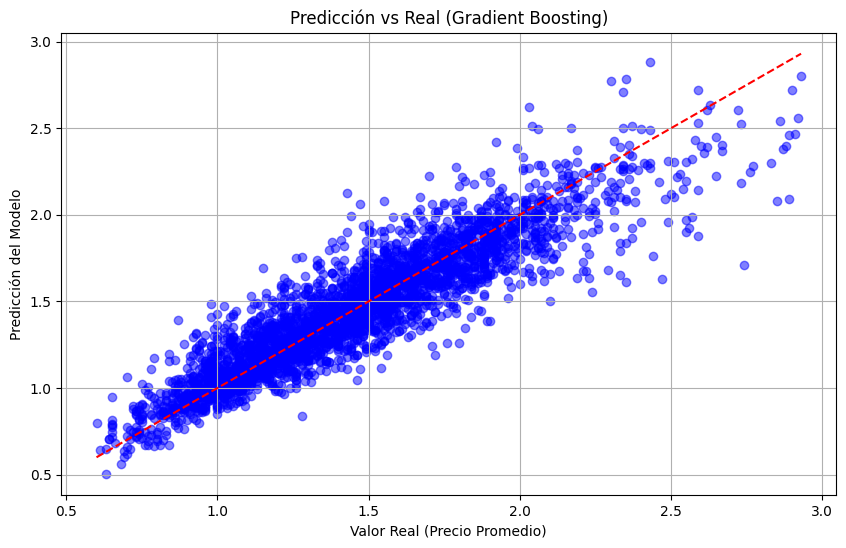

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicción vs Real (Gradient Boosting)')
plt.xlabel('Valor Real (Precio Promedio)')
plt.ylabel('Predicción del Modelo')
plt.grid(True)
plt.show()

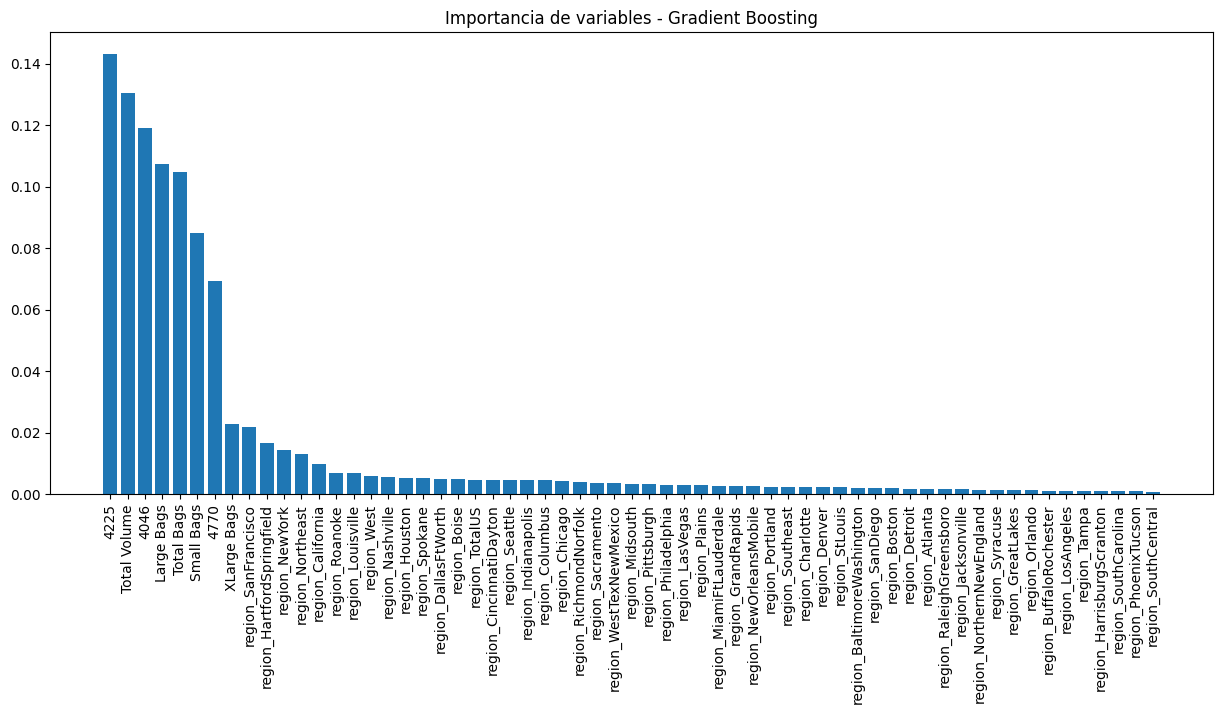

In [20]:
indices_gbr = np.argsort(importances_gbr)[::-1]
plt.figure(figsize=(15, 6))
plt.title("Importancia de variables - Gradient Boosting")
plt.bar(range(X_train.shape[1]), importances_gbr[indices_gbr], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices_gbr], rotation=90)
plt.show()


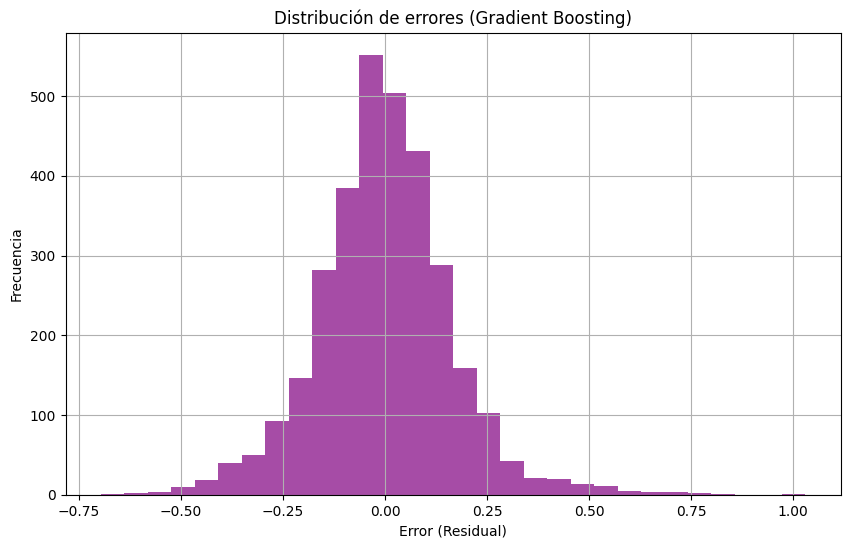

In [22]:
errors_gb = y_test - y_pred_gb

# Crear figura y eje
fig_gb, ax_gb = plt.subplots(figsize=(10, 6))

# Hacer la gráfica
ax_gb.hist(errors_gb, bins=30, color='purple',  alpha=0.7)
ax_gb.set_title('Distribución de errores (Gradient Boosting)')
ax_gb.set_xlabel('Error (Residual)')
ax_gb.set_ylabel('Frecuencia')
ax_gb.grid(True)





## Regresión Lineal
# Que es?

La Regresión Lineal es el modelo de predicción más simple que existe para problemas de regresión: Supone que la relación entre las variables de entrada (X) y la salida (Y) es una línea recta (o un plano si hay varias variables). Matemáticamente intenta ajustar una recta que minimiza el error cuadrático entre las predicciones y los valores reales.
Que hace?

    Asume que cada variable (como Total Volume, type, region, year, etc.) tiene un efecto lineal en el precio.

    Calcula coeficientes 𝛽 β que indican cuánto sube o baja el precio por cada unidad de cambio en las variables.

    Predice el precio como una combinación lineal de las entradas.

Ventajas:

    Muy rápido de entrenar.
    Fácil de interpretar.

Desventajas:

    Asume relación lineal entre las variables y el precio.
    El mercado de aguacates probablemente no tiene una relación estrictamente lineal (hay estacionalidad, diferencias regionales, efectos no lineales...).

Puede servir como baseline (modelo de referencia sencillo), pero no esperaría que sea el mejor.

En pocas palabras, no es un modelo útil en este caso debido a que

    Relaciones no lineales: solo capta relaciones lineales, y en nuestro caso el precio del aguacate varia de forma lineal con el volumen, region, tipo, fecha etc
    Interacción de variables: No capta bien las interaccions entre variables, algunas variables en el dataset de aguacates interactuan de forma compleja (type, region) con los precios
    Outliers: Muy sensible a valores atipicos
    Underfitting: tiende a sar como salida un modelo muy simple que no se adapta bien, en este caso se necesita un modelo que capture fluctuaciones reales del precio



In [23]:
lr = LinearRegression( )
lr.fit(X_train, y_train)


LinearRegression()

In [24]:
y_pred_lr = lr.predict(X_test)


In [25]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr, 'Error': y_test - y_pred_lr}) 
df_pred 


,Actual,Predicted,Error
8102,1.69,1.326671,0.363329
1483,1.07,1.465858,-0.395858
9625,1.53,1.515432,0.014568
12304,1.49,1.598662,-0.108662
15248,1.26,1.475220,-0.215220
...,...,...,...
9239,1.51,1.381043,0.128957
7773,1.65,1.635864,0.014136
609,1.06,1.087954,-0.027954
12341,1.55,1.601760,-0.051760


In [26]:
print(f"Coeficientes: {lr.coef_}")
print(f"Intercepto: {lr.intercept_}")


Coeficientes: [ 3.89017624e-04 -3.90099545e-04 -3.89998759e-04 -3.90020253e-04
 -2.86964678e-02  2.83063146e-02  2.83066423e-02  2.83102238e-02
  1.89291556e-03  3.33998477e-01 -2.03175549e-01  2.07083937e-01
 -3.13704586e-02  2.52370197e-01  1.03429573e-01  3.37015498e-01
 -2.66214404e-01 -2.61335613e-01 -1.57944116e-01  1.53358338e-02
 -1.48642331e-01 -2.76877114e-02 -9.09206647e-03  3.45572620e-02
  3.78548433e-01 -1.46448822e-01 -2.13048106e-01 -7.21144011e-03
 -8.13021970e-02 -6.42410593e-02 -2.77161632e-01  1.20820094e-01
  9.60648429e-02 -2.93460400e-01 -1.64275063e-01  5.47907053e-01
  4.05912289e-01  8.49251051e-02  6.56233029e-02  2.46998425e-01
  1.39154896e-01 -1.86729457e-01  1.58679287e-01  4.75195581e-02
  9.26058717e-02 -1.81870473e-01 -2.88831559e-01  2.29771380e-01
  7.34174470e-02  6.12674327e-01  1.71086225e-01 -2.76553038e-02
 -1.62041091e-01  9.34438042e-02 -1.19991699e-01 -5.19614890e-02
 -5.53224481e-02 -3.79177355e-04  6.95557404e-01  1.60076546e-01
  9.0599050

In [27]:
MSE_LR = mean_squared_error(y_test, y_pred_lr)
R2_LR = r2_score(y_test, y_pred_lr)
print(f"Error Cuadrático Medio: {mean_squared_error(y_test, y_pred_lr)}")
print(f"R²: {r2_score(y_test, y_pred_lr)}")


Error Cuadrático Medio: 0.08328883124972666
R²: 0.46977238722134396


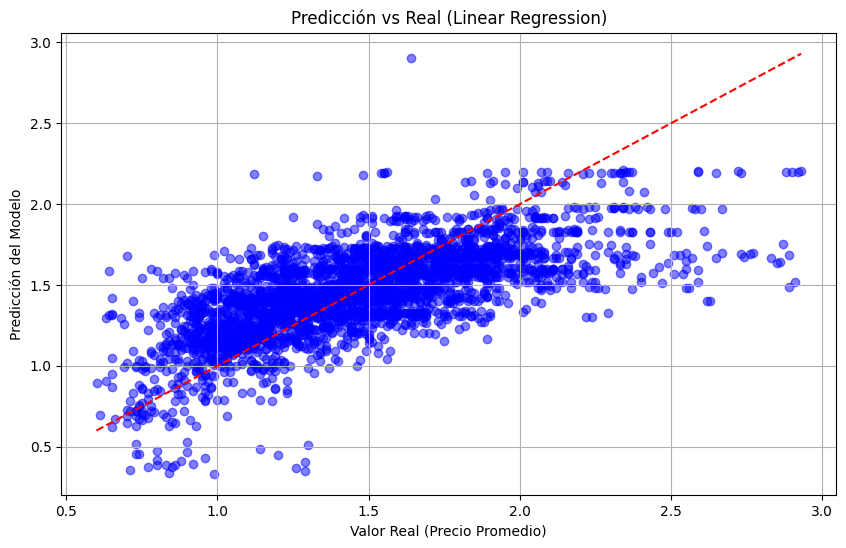

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicción vs Real (Linear Regression)')
plt.xlabel('Valor Real (Precio Promedio)')
plt.ylabel('Predicción del Modelo')
plt.grid(True)
plt.show()

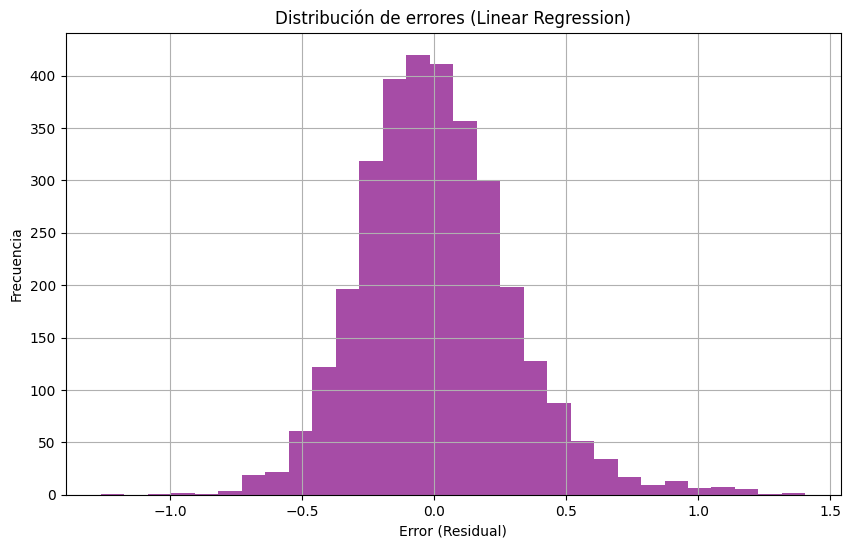

In [29]:
errors_lr = y_test - y_pred_lr

# Crear figura y eje
fig_lr, ax_lr = plt.subplots(figsize=(10, 6))

# Hacer la gráfica
ax_lr.hist(errors_lr, bins=30, color='purple',  alpha=0.7)
ax_lr.set_title('Distribución de errores (Linear Regression)')
ax_lr.set_xlabel('Error (Residual)')
ax_lr.set_ylabel('Frecuencia')
ax_lr.grid(True)


## Decision Tree Regressor
# Que es?

Un árbol de decisión predice valores dividiendo el espacio de datos en partes, como si fueran "sí" y "no" en cada pregunta.

Crea una estructura de árbol donde:

    Cada nodo interno representa una condición sobre una variable (¿Total Volume > 10000?).

    Cada rama representa una decisión basada en esa condición.

    Cada hoja del árbol contiene el valor promedio de las observaciones que cayeron allí.

Matemáticamente, busca dividir los datos de manera que minimice el error cuadrático medio (MSE) en cada división.
Que hace?

Aprende reglas simples tipo "si el volumen de ventas es alto y el tipo es 'conventional', entonces el precio promedio suele ser bajo". Ajusta muy bien a datos que tienen patrones basados en umbrales claros (como por ejemplo cambios de precio por temporada o tipo).
Ventaja

    Capta relaciones no lineales y interacciones fácilmente.
    Fácil de interpretar (puedes ver el árbol).
    No necesita normalizar datos o hacer preprocesamiento complejo.

Desventaja

    Puede sobreajustar mucho si no limitas la profundidad.
    No generaliza tan bien como Random Forest o Boosting.
    Es muy sensible a cambios en los datos (pequeñas variaciones pueden cambiar mucho el árbol).

En general no es muy bueno ya que tiende a memorizar los datos de entrenamiento.


In [31]:
dt_reg = DecisionTreeRegressor(max_depth=8)
dt_reg.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=8)

In [32]:
y_pred_dt = dt_reg.predict(X_test)
MSE_DT = mean_squared_error(y_test, y_pred_dt)
R2_DT = r2_score(y_test, y_pred_dt)
print(f"Decision Tree MSE: {mean_squared_error(y_test, y_pred_dt):.3f}")
print(f"Decision Tree R2: {r2_score(y_test, y_pred_dt):.3f}")
feature_names = x.columns
importances_dt = dt_reg.feature_importances_


Decision Tree MSE: 0.069
Decision Tree R2: 0.559


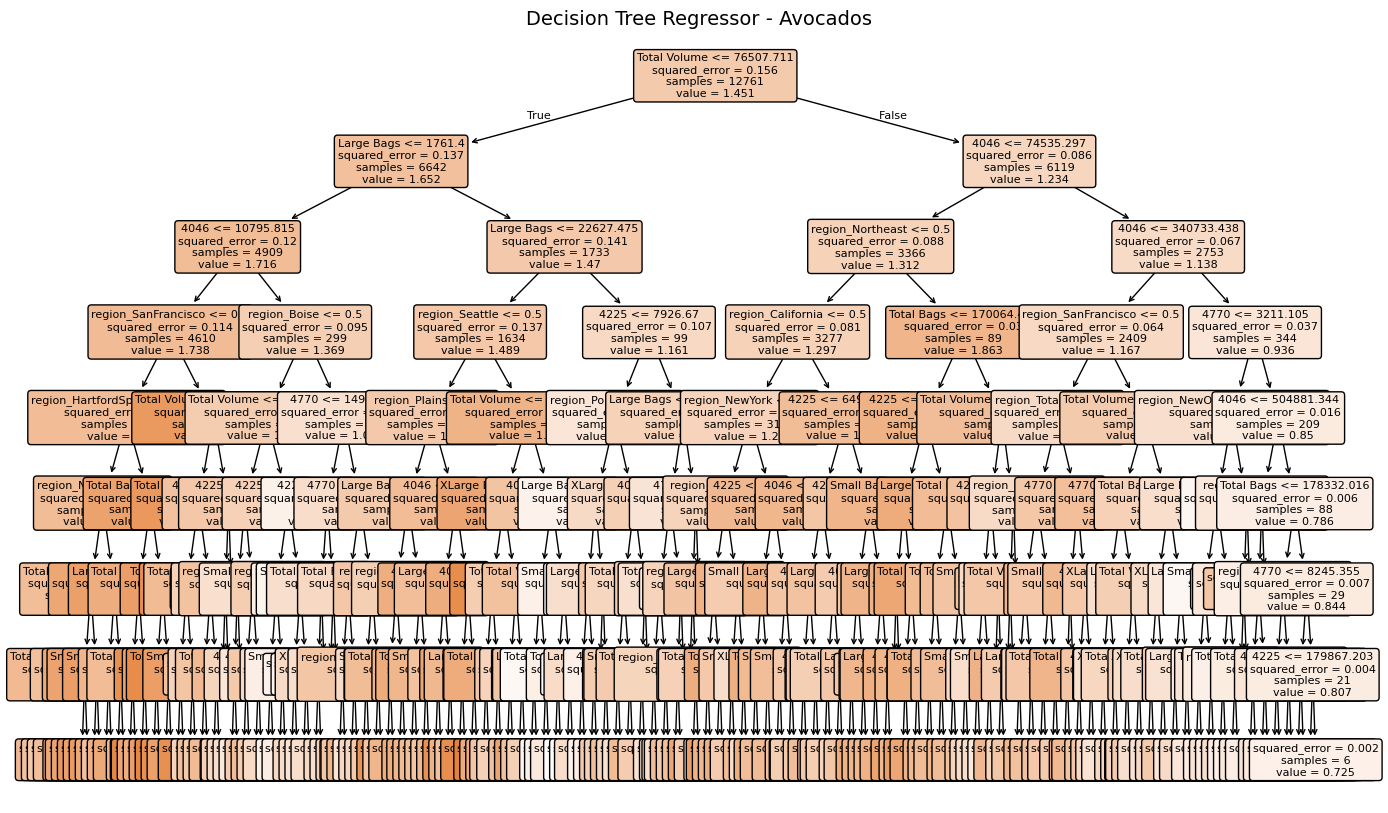

In [33]:
a = plt.figure(figsize=(16,10))
plot_tree(
    dt_reg,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree Regressor - Avocados", fontsize=14)
plt.show()


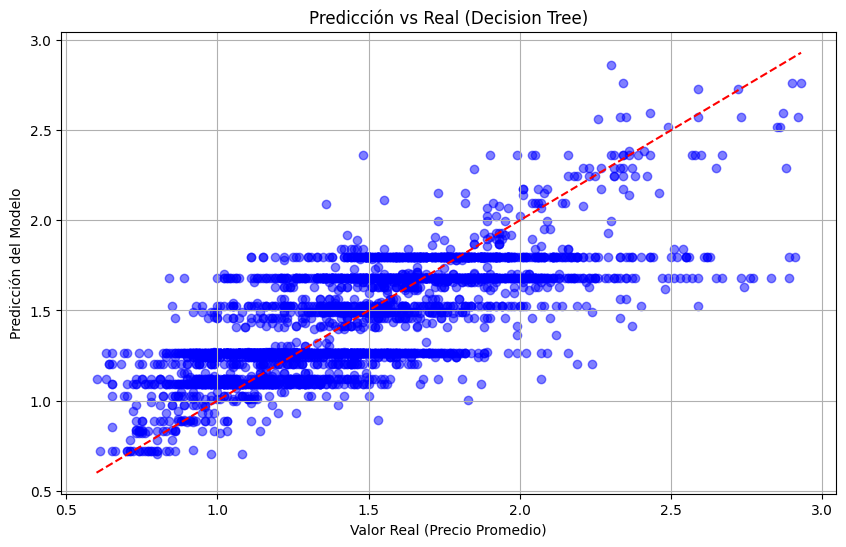

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicción vs Real (Decision Tree)')
plt.xlabel('Valor Real (Precio Promedio)')
plt.ylabel('Predicción del Modelo')
plt.grid(True)
plt.show()



# Que sucedió en la grafica?

Un árbol de decisión no predice valores continuos suaves como lo hace, por ejemplo, un modelo de regresión lineal o un Gradient Boosting.

    Lo que hace es dividir el espacio en regiones (particiones), y para cada región, predice un único valor constante (el promedio de los datos de esa hoja).
    Por eso muchas predicciones son exactamente iguales, incluso si los valores reales son muy variados.
    En la gráfica: eso se traduce en bandas horizontales donde todas las predicciones son iguales a pesar de que los valores reales (x) cambian mucho.



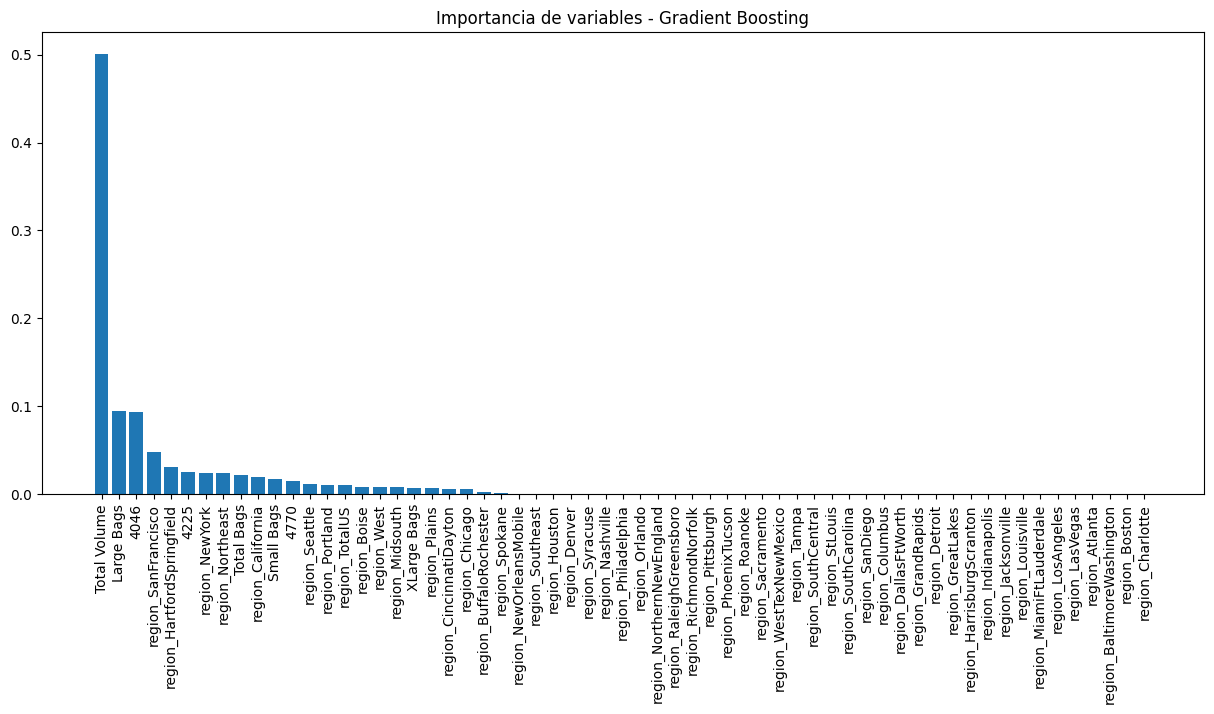

In [35]:
indices_dt = np.argsort(importances_dt)[::-1]
plt.figure(figsize=(15, 6))
plt.title("Importancia de variables - Gradient Boosting")
plt.bar(range(X_train.shape[1]), importances_dt[indices_dt], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices_dt], rotation=90)
plt.show()


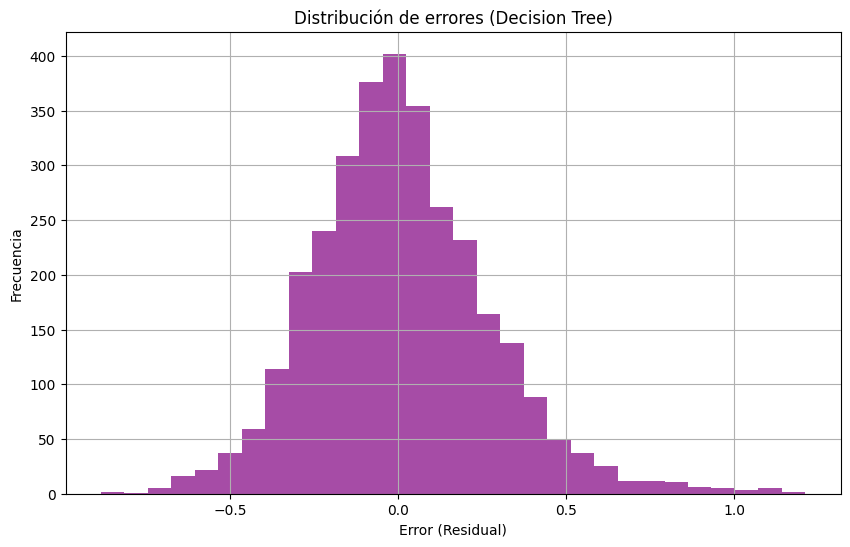

In [36]:


errors_dt = y_test - y_pred_dt

# Crear figura y eje
fig_dt, ax_dt= plt.subplots(figsize=(10, 6))

# Hacer la gráfica
ax_dt.hist(errors_dt, bins=30, color='purple',  alpha=0.7)
ax_dt.set_title('Distribución de errores (Decision Tree)')
ax_dt.set_xlabel('Error (Residual)')
ax_dt.set_ylabel('Frecuencia')
ax_dt.grid(True)



     
